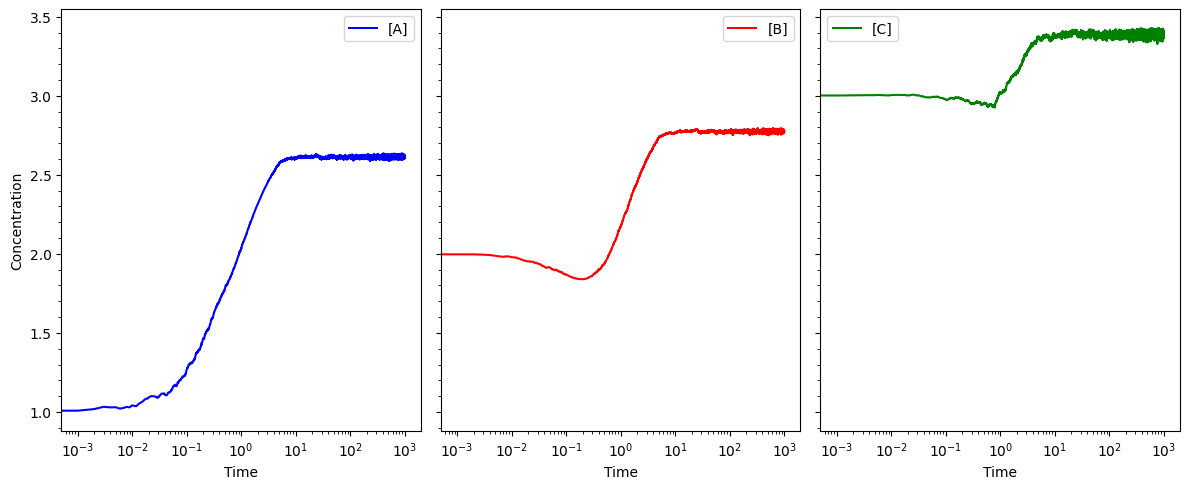

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(u, p):
    A, B, C = u
    k1, k2, k3, r_a, r_c, A_tild, C_tild, V = p
    dA = k1*B - k1*A + k2*B*B - k2*A*B - r_a*A + r_a*A_tild
    dB = k1*A - k1*B + k2*A*B - k2*B*B + k3*C - k3*B
    dC = k3*B - k3*C - r_c*C + r_c*C_tild
    return np.array([dA, dB, dC])

def g(u, p):    
    A, B, C = u
    k1, k2, k3, r_a, r_c, A_tild, C_tild, V = p
    dA = (np.sqrt(k1*B) - np.sqrt(k1*A) + np.sqrt(k2*B*B) - np.sqrt(k2*A*B) - np.sqrt(r_a*A) + np.sqrt(r_a*A_tild)) / np.sqrt(V)
    dB = (np.sqrt(k1*A) - np.sqrt(k1*B) + np.sqrt(k2*A*B) - np.sqrt(k2*B*B) + np.sqrt(k3*C) - np.sqrt(k3*B)) / np.sqrt(V)
    dC = (np.sqrt(k3*B) - np.sqrt(k3*B) - np.sqrt(r_c*C) + np.sqrt(r_c*C_tild)) / np.sqrt(V)
    return np.array([dA, dB, dC])

dt = 0.001
V = 50
time = 1000000
time_array = np.arange(0, time*dt, dt)
A_initial = 1.0; B_initial = 2.0; C_initial = 3.0
x_array = np.empty((time, 3)); x_array[0] = initial_state = np.array([A_initial, B_initial, C_initial])

for i, xi in enumerate(x_array[:-1]):
    x_array[i+1] = xi + f(xi, (1,1,1,1,1,2,4,V)) * dt + g(xi, (1,1,1,1,1,2,4,V)) * np.random.normal(0, np.sqrt(dt), 3)

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12,5))
axes[0].set_ylabel("Concentration")

axes[0].plot(time_array, x_array[:,0], label='[A]', color='blue')
axes[1].plot(time_array, x_array[:,1], label='[B]', color='red')
axes[2].plot(time_array, x_array[:,2], label='[C]', color='green')
for ax in axes:
    ax.set_xlabel("Time")
    ax.set_xscale('log')
    ax.legend()
plt.minorticks_on()
plt.tight_layout()
plt.show()